In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os,cv2
directory='/kaggle/input/ckplus/CK+48'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    print('Loaded images from '+data_dir)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape
# Any results you write to the current directory are saved as output.

Loaded images from anger
Loaded images from contempt
Loaded images from surprise
Loaded images from happy
Loaded images from disgust
Loaded images from sadness
Loaded images from fear


(981, 48, 48, 3)

In [17]:
print(emotions)
def getLabel(id):
    return emotions[id]

['anger', 'contempt', 'surprise', 'happy', 'disgust', 'sadness', 'fear']


In [18]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2,shuffle=True)
X_train.shape

(784, 48, 48, 3)

[1. 0. 0. 0. 0. 0. 0.]


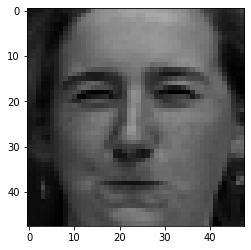

In [19]:
from matplotlib import pyplot as plt
print(y_train[499])
plt.imshow(X_train[499], interpolation='nearest')
plt.show()

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
data_generator_no_aug = ImageDataGenerator()

train_data_generator=data_generator_with_aug.flow(X_train,y_train)
validation_generator=data_generator_with_aug.flow(X_test,y_test)

In [21]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/250
25/25 [==============================] - 1s 53ms/step - loss: 1.9054 - accuracy: 0.2258 - val_loss: 1.6801 - val_accuracy: 0.1777
Epoch 2/250
25/25 [==============================] - 1s 35ms/step - loss: 1.8736 - accuracy: 0.2079 - val_loss: 1.7597 - val_accuracy: 0.2589
Epoch 3/250
 5/25 [=====>........................] - ETA: 1s - loss: 1.8399 - accuracy: 0.2250

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.159443). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


25/25 [==============================] - 1s 47ms/step - loss: 1.8610 - accuracy: 0.2321 - val_loss: 1.7819 - val_accuracy: 0.1371
Epoch 4/250
25/25 [==============================] - 1s 41ms/step - loss: 1.7436 - accuracy: 0.2742 - val_loss: 1.1105 - val_accuracy: 0.3096
Epoch 5/250
25/25 [==============================] - 1s 34ms/step - loss: 1.5659 - accuracy: 0.3763 - val_loss: 1.0280 - val_accuracy: 0.4112
Epoch 6/250
25/25 [==============================] - 1s 33ms/step - loss: 1.5062 - accuracy: 0.4349 - val_loss: 1.3072 - val_accuracy: 0.4162
Epoch 7/250
25/25 [==============================] - 1s 33ms/step - loss: 1.3877 - accuracy: 0.4503 - val_loss: 0.5842 - val_accuracy: 0.4518
Epoch 8/250
25/25 [==============================] - 1s 34ms/step - loss: 1.4604 - accuracy: 0.3992 - val_loss: 1.2277 - val_accuracy: 0.4162
Epoch 9/250
25/25 [==============================] - 1s 35ms/step - loss: 1.4037 - accuracy: 0.4401 - val_loss: 1.1817 - val_accuracy: 0.4518
Epoch 10/250
25/25

25/25 [==============================] - 1s 33ms/step - loss: 0.3751 - accuracy: 0.8495 - val_loss: 1.1349 - val_accuracy: 0.8934
Epoch 61/250
25/25 [==============================] - 1s 34ms/step - loss: 0.3312 - accuracy: 0.8482 - val_loss: 0.0068 - val_accuracy: 0.9036
Epoch 62/250
25/25 [==============================] - 1s 33ms/step - loss: 0.3297 - accuracy: 0.8724 - val_loss: 0.0084 - val_accuracy: 0.9036
Epoch 63/250
25/25 [==============================] - 1s 33ms/step - loss: 0.5676 - accuracy: 0.8189 - val_loss: 0.8627 - val_accuracy: 0.8731
Epoch 64/250
25/25 [==============================] - 1s 33ms/step - loss: 0.5187 - accuracy: 0.8087 - val_loss: 0.5736 - val_accuracy: 0.8985
Epoch 65/250
25/25 [==============================] - 1s 32ms/step - loss: 0.4186 - accuracy: 0.8291 - val_loss: 1.2101e-04 - val_accuracy: 0.8426
Epoch 66/250
25/25 [==============================] - 1s 33ms/step - loss: 0.3546 - accuracy: 0.8559 - val_loss: 0.0903 - val_accuracy: 0.8782
Epoch 67

25/25 [==============================] - 1s 33ms/step - loss: 0.2710 - accuracy: 0.9247 - val_loss: 0.0194 - val_accuracy: 0.9442
Epoch 118/250
25/25 [==============================] - 1s 35ms/step - loss: 0.2644 - accuracy: 0.9158 - val_loss: 0.0889 - val_accuracy: 0.9645
Epoch 119/250
25/25 [==============================] - 1s 35ms/step - loss: 0.2333 - accuracy: 0.9069 - val_loss: 0.1117 - val_accuracy: 0.9645
Epoch 120/250
25/25 [==============================] - 1s 33ms/step - loss: 0.2180 - accuracy: 0.9222 - val_loss: 0.2114 - val_accuracy: 0.9645
Epoch 121/250
25/25 [==============================] - 1s 32ms/step - loss: 0.2655 - accuracy: 0.9184 - val_loss: 0.0499 - val_accuracy: 0.9340
Epoch 122/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1503 - accuracy: 0.9528 - val_loss: 0.1685 - val_accuracy: 0.9645
Epoch 123/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1578 - accuracy: 0.9452 - val_loss: 0.0037 - val_accuracy: 0.9645
Epoch 

Epoch 174/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1018 - accuracy: 0.9668 - val_loss: 0.0729 - val_accuracy: 0.9898
Epoch 175/250
25/25 [==============================] - 1s 32ms/step - loss: 0.1167 - accuracy: 0.9579 - val_loss: 0.0037 - val_accuracy: 0.9695
Epoch 176/250
25/25 [==============================] - 1s 34ms/step - loss: 0.1383 - accuracy: 0.9554 - val_loss: 0.1015 - val_accuracy: 0.9695
Epoch 177/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1650 - accuracy: 0.9452 - val_loss: 0.0921 - val_accuracy: 0.9797
Epoch 178/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1577 - accuracy: 0.9439 - val_loss: 6.6605e-05 - val_accuracy: 0.8985
Epoch 179/250
25/25 [==============================] - 1s 33ms/step - loss: 0.3074 - accuracy: 0.9273 - val_loss: 0.1431 - val_accuracy: 0.9645
Epoch 180/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1611 - accuracy: 0.9388 - val_loss: 2.1967 - val_accur

25/25 [==============================] - 1s 33ms/step - loss: 0.1191 - accuracy: 0.9554 - val_loss: 0.0388 - val_accuracy: 0.9797
Epoch 231/250
25/25 [==============================] - 1s 33ms/step - loss: 0.1034 - accuracy: 0.9656 - val_loss: 0.0260 - val_accuracy: 0.9797
Epoch 232/250
25/25 [==============================] - 1s 35ms/step - loss: 0.0921 - accuracy: 0.9592 - val_loss: 0.7290 - val_accuracy: 0.9898
Epoch 233/250
25/25 [==============================] - 1s 34ms/step - loss: 0.1313 - accuracy: 0.9528 - val_loss: 6.4336e-04 - val_accuracy: 0.9695
Epoch 234/250
25/25 [==============================] - 1s 34ms/step - loss: 0.1641 - accuracy: 0.9464 - val_loss: 6.6518e-06 - val_accuracy: 0.9746
Epoch 235/250
25/25 [==============================] - 1s 34ms/step - loss: 0.1339 - accuracy: 0.9592 - val_loss: 0.0179 - val_accuracy: 0.9898
Epoch 236/250
25/25 [==============================] - 1s 32ms/step - loss: 0.1132 - accuracy: 0.9643 - val_loss: 6.6007e-05 - val_accuracy: 0

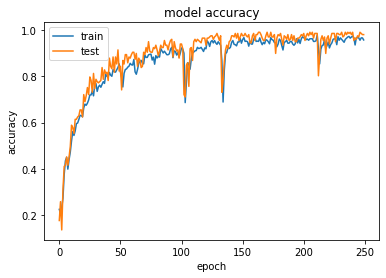

In [22]:
import matplotlib.pyplot as plt
history=model.fit_generator(train_data_generator,epochs=250,validation_data=validation_generator)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

contempt


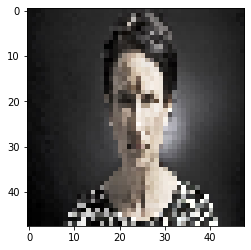

In [35]:
from matplotlib import pyplot as plt
from PIL import Image
import cv2

filename='/kaggle/input/test-images/angry_face_1170.jpg'

image=Image.open(filename)
test_image=image.resize((48,48))
plt.imshow(test_image)
test_image=np.array(test_image)
test_image=test_image/255
test_image=np.reshape(test_image,(1,48,48,3))
out=model.predict_classes(test_image)
for i in out:
    print(getLabel(i))